In [1]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import konlpy.tag

def get_blog():
    keyword = input('검색어를 입력하세요:')
    client_id = ""
    client_secret = ""

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []



    for pagenum in range(1,1000,100):

        try:

            url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)
            request = urllib.request.Request(url)
            request.add_header("X-Naver-Client-Id",client_id)
            request.add_header("X-Naver-Client-Secret",client_secret)
            response = urllib.request.urlopen(request)
            rescode = response.getcode()
            if(rescode==200):
                response_body = response.read()
                jtemp = response_body.decode('utf-8')
                jdata = json.loads(jtemp)

                jdata['items']

                for temp in jdata['items']:  
                    hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                    tdata = temp['title']
                    ldata = temp['link']
                    ddata = hangul.sub(r'',temp['description'])

                    tlist.append(tdata)
                    llist.append(ldata)
                    dlist.append(ddata)

            else:
                print("Error Code:" + rescode)

        except:
            print('Error')



    result = []
    for temp in range(len(tlist)):
        temp1 = []
        temp1.append(tlist[temp])
        temp1.append(llist[temp])
        temp1.append(dlist[temp])

        result.append(temp1)


    f = open('{0} - 네이버API 블로그검색.csv'.format(keyword) , 'w', encoding='utf-8')
    f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
    for temp in result:    
        f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
    f.close()
    
    
    return result

In [20]:
import konlpy
from konlpy.tag import Okt
from collections import Counter

def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()


def get_tagslists():
    pass


def get_text(data):
    result_text = ''
    for temp in data:
        result_text = result_text +' ' +  temp[2]

    return result_text


def Wordcloud(data , savename , maskname=''):
    noun_text = ''
    for word in data:
        noun_text = noun_text +' ' + word
    
    if maskname == '':
        wc = WordCloud( font_path='font/BMHANNAPro.ttf' , background_color='white', max_font_size=60, colormap='Blues_r').generate(noun_text)
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='font/BMHANNAPro.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='PuBuGn').generate(noun_text)
        

    plt.figure(figsize=(10,15))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file(savename + ".png")


In [21]:
bdata = get_blog()
rtext = get_text(bdata)

검색어를 입력하세요:다이어리 펀딩성공


In [22]:

import pandas as pd
n = pd.read_csv('./neg_pol_word.csv',sep='\n')
nag = []
for i in n['0']:
    nag.append(i)

In [23]:

p = pd.read_csv('./pos_pol_word.csv',sep='\n')
pos = []
for i in p['0']:
    pos.append(i)


stopwords = ['펀딩','텀블벅','나','와디즈','와디','제품','후원','펀딩했던','응원','프로젝트','블로그','분', '등',
             '때', '너',  '저', '그', '더', '제', '금액', '후', '전', '달', '글', '워드', '오늘', '하나', '거','것','수',
             '가지','를', '권', '통해','알', '보온', '말', '해', '좀',  '굿', '번', '실패', '지금', '자신','바로','월','년',
             '집', '날', '사진', '진짜', '카드', '에', '여기', '모금', '건', '일기', '가', '플랫폼', '가장', '명','일','이','내',
             '의', '요', '때문', '킥','신년', '도착', '차', '두', '용', '뭐', '열', '후원자', '일단', '바름', '활용','안','앞',
             '후기', '용품', '양도', '네이버','구성', '돈', '인', '맘', '그냥','노트북', '구인', '구직', '기', '바','중',
             '종료', '온라인', '당신', '약', '스토어', '공', '한국', '걸', '포장', '눈', '공부', '데','기간', '만년','위', 
             '제공', '개발', '내용', '이유', '구입', '해도', '개인', '저자', '이후', '게', '방법', '마무리', '기억','개','북', 
             '별', '작년', '직접', '인쇄', '소식', '아래', '마지막', '게임', '와인','미니','식스', '출시', '무엇', '얼마','첫',
             '쓰기', '곳', '늘', '계속', '엄마', '블럭', '이름', '카페','기념', '실제','느낌','편','마감','줄','또한','가격',
             '지갑', '사회','점', '가계부','년도','아주', '질문','어제','테이', '팩' '만약', '팀','쿠션', '볼', '김', '적','다이어리']



for i in stopwords:
    pos.append(i)

In [24]:

def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    words = dict(count.most_common(ntags))
    
    
    for i in pos:
        if i in words:
            del words[i]
    return words

{'우드': 150, '제작': 83, '구매': 76, '진행': 73, '달력': 71, '책': 70, '이번': 67, '생각': 67, '선물': 64, '시작': 63, '사용': 62, '노트': 61, '스티커': 58, '사람': 58, '목표': 56, '마음': 48, '리': 47, '판매': 46, '상품': 46, '달성': 44, '준비': 43, '기록': 43, '시간': 43, '꼭': 41, '배송': 41, '참여': 40, '예정': 38, '디자인': 38, '또': 37, '사이트': 36, '우리': 36, '투자': 36, '계획': 34, '다시': 34, '원': 34, '올해': 34, '모두': 34, '세트': 33, '소개': 33, '기획': 33, '정보': 32, '정말': 32, '위해': 31, '대한': 31, '케이스': 31, '처음': 31, '만': 30, '핑구': 29, '및': 27, '이상': 26, '현재': 25, '다음': 25, '메모': 25, '보고': 25, '결제': 24, '오픈': 24, '창업': 24, '매일': 24, '관심': 23, '경우': 23, '스토리': 23, '이제': 23, '시': 22, '고민': 22, '작성': 22, '지난': 22, '사실': 22, '친구': 22, '아이디어': 22, '영화': 22, '서비스': 22, '킥스타터': 22, '여행': 22, '재테크': 22, '직장': 22, '가방': 21, '도전': 21, '작가': 21, '일상': 21, '일정': 21, '요즘': 21, '이야기': 21, '브랜드': 21, '경험': 20, '사업': 20, '조금': 20, '취업': 20, '기업': 20, '습관': 20, '연말': 19, '정도': 19, '회사': 19, '추가': 19, '하루': 19, '달러': 19, '만원': 18, '다른': 18, '로': 17, '내년': 17, '총':

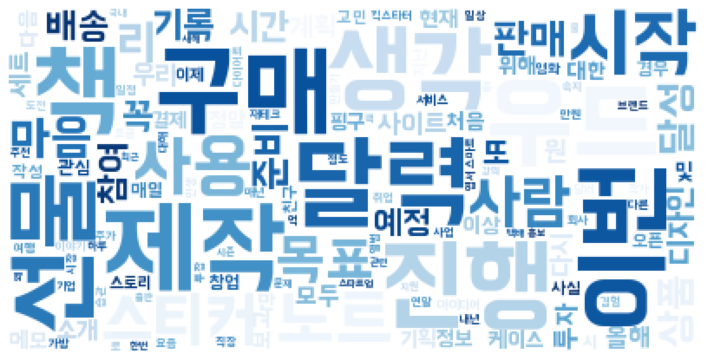

In [25]:
rtags = get_tags(rtext, ntags=300)
print(rtags)

Wordcloud(rtags, '펀딩성공분석')
